In [ ]:
import matplotlib
matplotlib.use('Agg')
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

import numpy as np
import matplotlib.pyplot as plt
from stable_baselines.results_plotter import load_results, ts2xy, plot_curves, plot_results
from utils import plot_utils
from utils import utils
from utils import plot
%matplotlib inline

# set up matplotlib

plt.ion()

In [37]:
results = utils.load_group_results('logs/', verbose=True, mask="^logs/ppo2/.*33-40.*")

successfully loaded logs/ppo2/LunarLanderContinuous-v2_33-40_1
successfully loaded logs/ppo2/LunarLanderContinuous-v2_33-40_2
successfully loaded logs/ppo2/LunarLanderContinuous-v2_33-40_3
loaded 3 results


(<Figure size 842.4x595.44 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f806c899cc0>]],
       dtype=object))

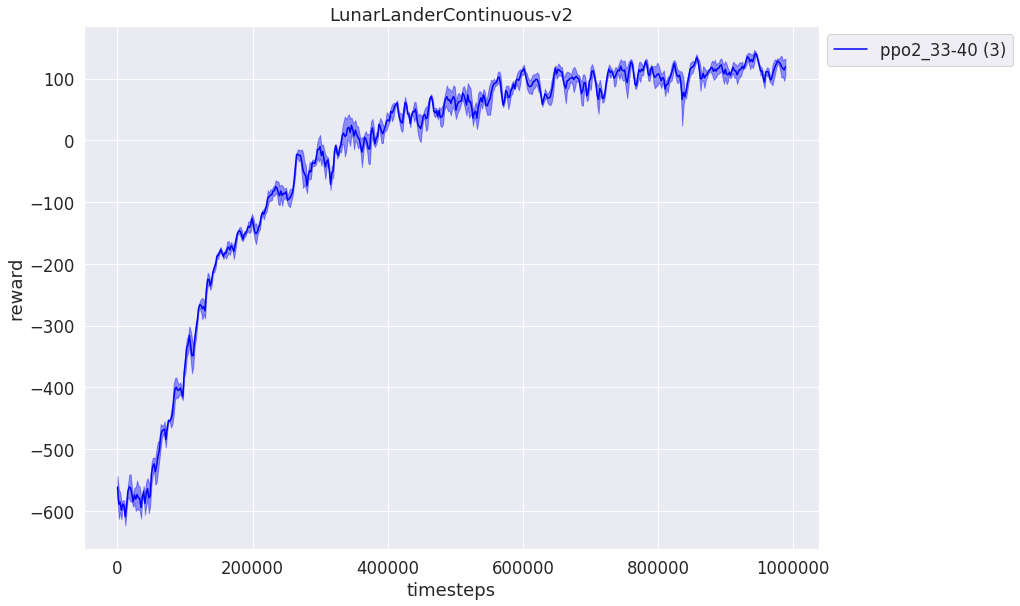

In [38]:
plot.plot_results(results, average_group=True, shaded_std=False, ybase=100, legend_outside=True, xaxis='timesteps')

# Playground (ignore the codes below)

In [ ]:
import gym
env = gym.make('LunarLanderContinuous-v2')

In [ ]:
env.reset()

In [ ]:
vars(env)

In [ ]:
dir(env)

In [ ]:
import gym.envs.box2d.lunar_lander as l

In [ ]:
env.__class__.env

In [ ]:
globals()['MAIN_ENGINE_POWER']

In [ ]:
env.__setattr__()

In [ ]:
import inspect

In [ ]:
pa = inspect.getfile(env.env.__class__)[:-3]

In [ ]:
lis = pa.split('/')

In [ ]:
lis = lis[lis.index('gym'):]

In [ ]:
lis = ".".join(lis)

In [ ]:
type(l)

In [ ]:
import importlib

In [ ]:
k = importlib.import_module(lis)

In [ ]:
k

In [ ]:
l == k

In [ ]:
vars(l)

In [ ]:
vars(l)['MAIN_ENGINE_POWER'] = 100